Saving 360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg to 360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr (1).jpg


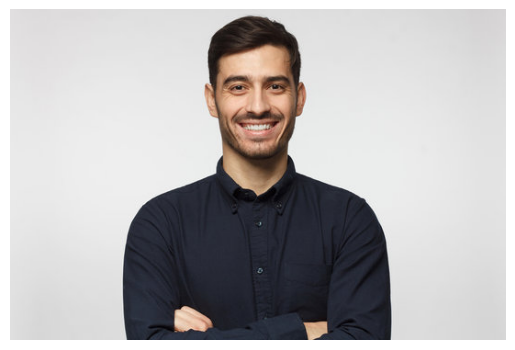

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image file
uploaded = files.upload()

# Get the first filename from the uploaded files
img_filename = list(uploaded.keys())[0]

# Open and display the image
img = Image.open(img_filename)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


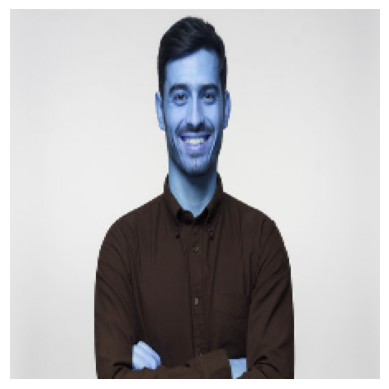

In [ ]:
#image prepreprocessing gautam sunilkumar
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(224, 224), normalize=True, grayscale=False):
    """
    Preprocess an image for object or face detection.

    Parameters:
    - image_path (str): Path to the input image.
    - target_size (tuple): Desired output size, usually matching model input size (width, height).
    - normalize (bool): Whether to normalize the pixel values to [0, 1].
    - grayscale (bool): Whether to convert the image to grayscale.

    Returns:
    - preprocessed_image (numpy.ndarray): The processed image ready for model input.
    """

    # Load the image
    image = cv2.imread(image_path)

    # Check if image is loaded successfully
    if image is None:
        raise ValueError("Image not found or could not be loaded.")

    # Resize the image to the target size
    image_resized = cv2.resize(image, target_size)

    # Convert to grayscale if specified
    if grayscale:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        image_resized = np.expand_dims(image_resized, axis=-1)  # Keep dimensions consistent

    # Normalize pixel values to the range [0, 1] if specified
    if normalize:
        image_resized = image_resized / 255.0

    # Expand dimensions to match model input requirements (batch size, height, width, channels)
    preprocessed_image = np.expand_dims(image_resized, axis=0)

    return preprocessed_image

a=preprocess_image("/content/360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg")
img = np.squeeze(a)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

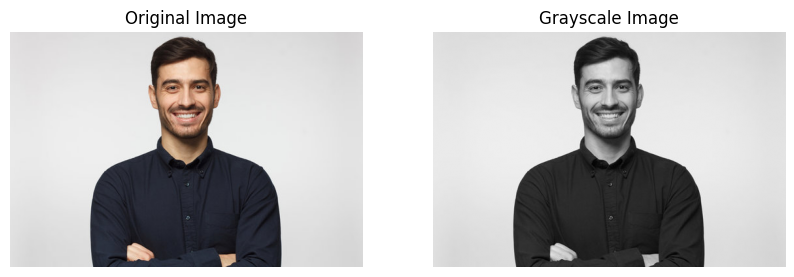

In [ ]:
# Read the image using OpenCV
img = cv2.imread("/content/360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg")

# Convert the image from BGR to RGB format (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Show grayscale image
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

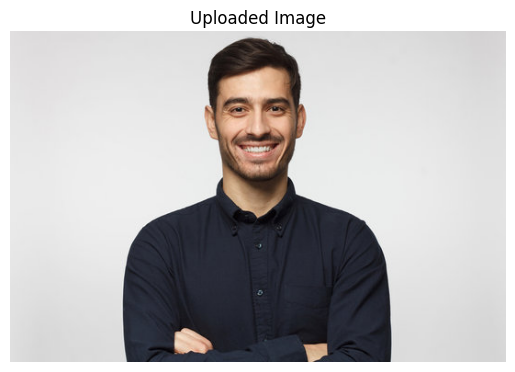

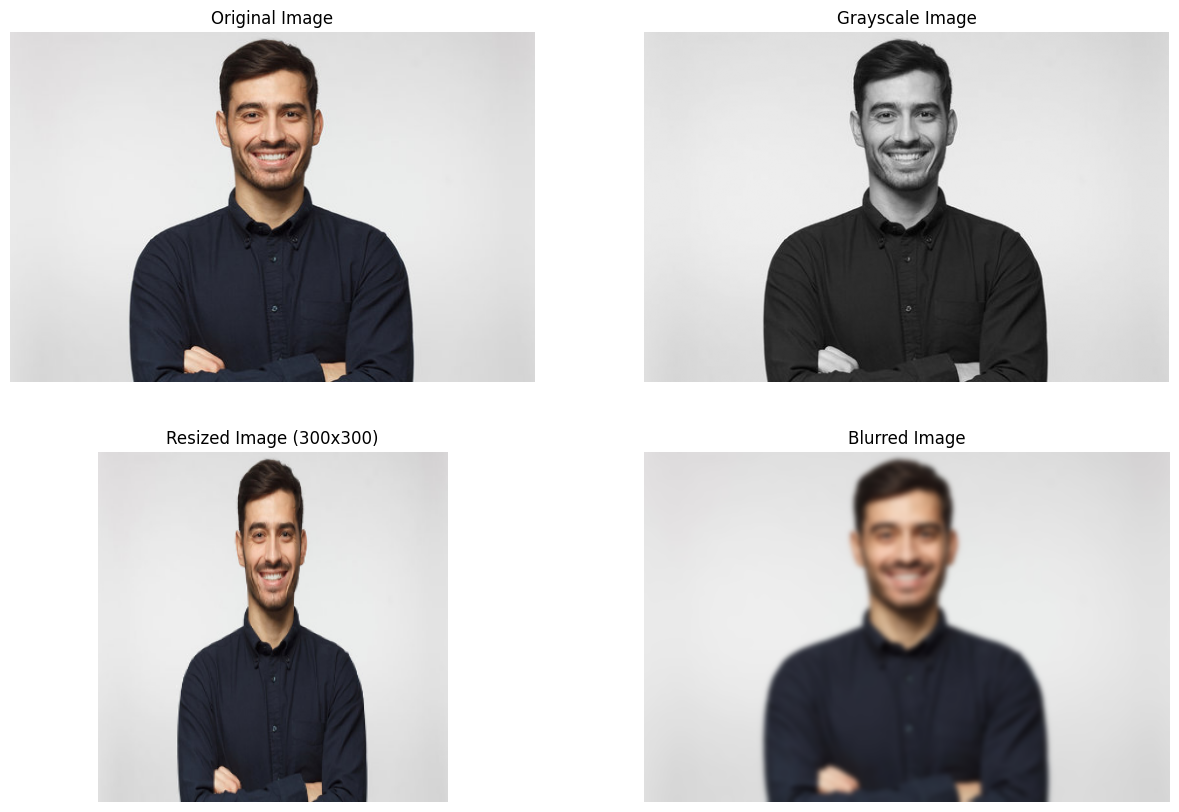

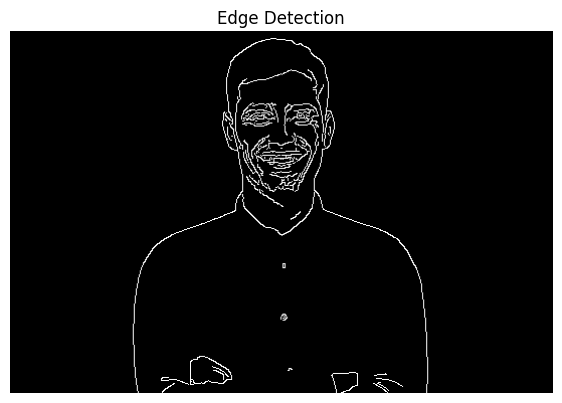

In [ ]:
from google.colab import files
from PIL import Image
import cv2
import matplotlib.pyplot as plt


# Get the first filename from the uploaded files
img_filename = list(uploaded.keys())[0]

# Open and display the image
img = Image.open(img_filename)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Uploaded Image")
plt.show()

# Read the image using OpenCV
img = cv2.imread(img_filename)

# Convert the image from BGR to RGB format (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image
img_resized = cv2.resize(img_rgb, (300, 300))  # Resize to 300x300

# Apply a Gaussian blur
img_blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)

# Apply edge detection
img_edges = cv2.Canny(img_gray, 100, 200)

# Display the processed images
plt.figure(figsize=(15, 10))

# Show original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Show grayscale image
plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Show resized image
plt.subplot(2, 2, 3)
plt.imshow(img_resized)
plt.title("Resized Image (300x300)")
plt.axis('off')

# Show blurred image
plt.subplot(2, 2, 4)
plt.imshow(img_blurred)
plt.title("Blurred Image")
plt.axis('off')

# Show edge-detected image
plt.figure(figsize=(7, 7))
plt.imshow(img_edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.show()


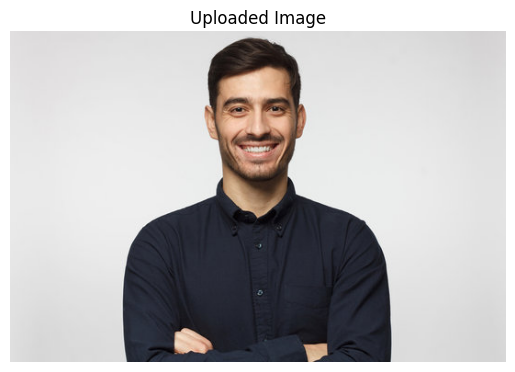

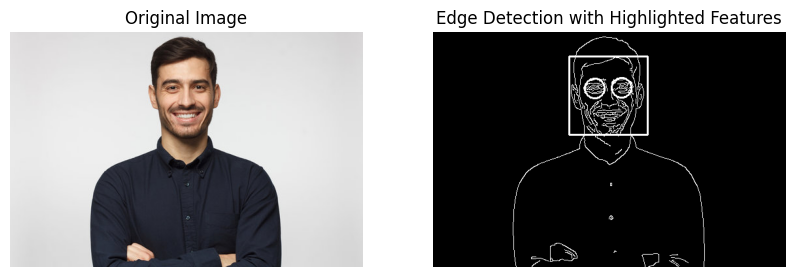

In [ ]:
  from google.colab import files
from PIL import Image
import cv2
import matplotlib.pyplot as plt


# Get the first filename from the uploaded files
img_filename = list(uploaded.keys())[0]

# Open and display the image
img = Image.open(img_filena me)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Uploaded Image")
plt.show()

# Read the image using OpenCV
img = cv2.imread(img_filename)

# Convert the image from BGR to RGB format (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
img_edges = cv2.Canny(img_gray, 100, 200)

# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop through detected faces
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(img_edges, (x, y), (x+w, y+h), (255, 255, 255), 2)

    # Region of interest for face
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_edges = img_edges[y:y+h, x:x+w]
    roi_color = img_rgb[y:y+h, x:x+w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        # Highlight eyes with circles
        center = (x + ex + ew // 2, y + ey + eh // 2)
        radius = ew // 2 `
        cv2.circle(img_edges, center, radius, (255, 255, 255), 2)

# Display the processed images
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Show edge-detected image with highlighted features
plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap='gray')
plt.title("Edge Detection with Highlighted Features")
plt.axis('off')

plt.show()
